/Users/williamcoulter/.local/share/virtualenvs/investment-calculation-iK7qoR46/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


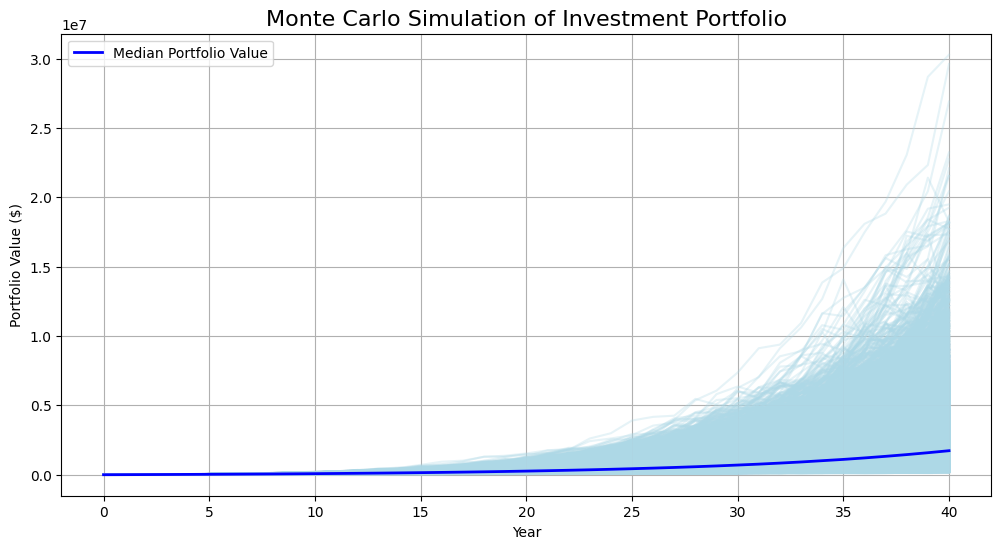

After 40 years:
Median Portfolio Value: $1,731,290.34
99% Confidence Interval: ($316,068.19, $10,567,715.32)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

initial_investment = 0
annual_contribution = 5000
mean_return = 0.10
volatility = 0.15
years = 40
num_simulations = 50000

def simulate_portfolio(initial, contribution, mean, vol, years):
    portfolio = [initial]
    for year in range(years):
        annual_return = np.random.normal(mean, vol)
        new_value = portfolio[-1] * (1 + annual_return) + contribution
        portfolio.append(new_value)
    return portfolio

simulations = []
for i in range(num_simulations):
    simulations.append(simulate_portfolio(initial_investment, annual_contribution, mean_return, volatility, years))

simulations_df = pd.DataFrame(simulations).T
simulations_df.index.name = "Year"

plt.figure(figsize=(12, 6))
plt.plot(simulations_df, color="lightblue", alpha=0.3)
plt.plot(simulations_df.median(axis=1), color="blue", label="Median Portfolio Value", linewidth=2)
plt.title("Monte Carlo Simulation of Investment Portfolio", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid()
plt.show()

final_values = simulations_df.iloc[-1] 
lower_bound = np.percentile(final_values, 0.5)
upper_bound = np.percentile(final_values, 99.5)
median_value = final_values.median()

print(f"After {years} years:")
print(f"Median Portfolio Value: ${median_value:,.2f}")
print(f"99% Confidence Interval: (${lower_bound:,.2f}, ${upper_bound:,.2f})")


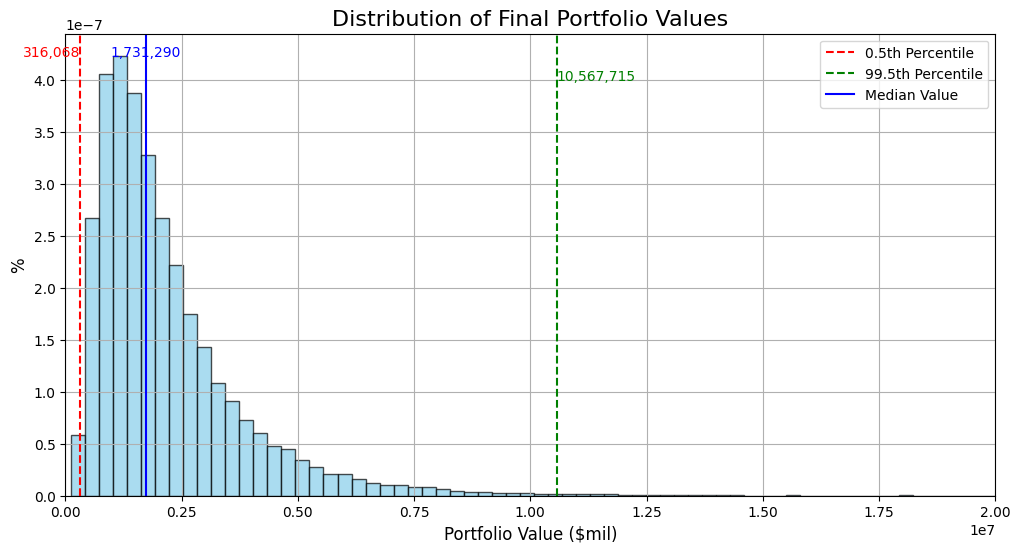

In [30]:
# Plot the distribution of final portfolio values
plt.figure(figsize=(12, 6))
plt.hist(final_values, bins=100, color="skyblue", edgecolor="black", alpha=0.7, density=True)

plt.axvline(lower_bound, color="red", linestyle="--", label="0.5th Percentile")
plt.text(lower_bound, plt.ylim()[1] * 0.95, f"{lower_bound:,.0f}", color="red", ha="right", fontsize=10)

plt.axvline(upper_bound, color="green", linestyle="--", label="99.5th Percentile")
plt.text(upper_bound, plt.ylim()[1] * 0.9, f"{upper_bound:,.0f}", color="green", ha="left", fontsize=10)

plt.axvline(median_value, color="blue", linestyle="-", label="Median Value")
plt.text(median_value, plt.ylim()[1] * 0.95, f"{median_value:,.0f}", color="blue", ha="center", fontsize=10)

# Add titles, labels, and legend
plt.title("Distribution of Final Portfolio Values", fontsize=16)
plt.xlabel("Portfolio Value ($mil)", fontsize=12)
plt.ylabel("%", fontsize=12)
plt.xlim(0, 20000000)
plt.legend()
plt.grid()
plt.show()


In [31]:
total_contributions = initial_investment + annual_contribution * years

negative_returns_count = np.sum(final_values < total_contributions)
at_least_double_returns_count = np.sum(final_values > total_contributions * 2)
at_least_4_x_returns_count = np.sum(final_values > total_contributions * 4)
at_least_10_x_returns_count = np.sum(final_values > total_contributions * 10)
greater_than_linear_count = np.sum(final_values > 2000000)

negative_returns_percentage = (negative_returns_count / num_simulations) * 100
at_least_double_returns_percentage = (at_least_double_returns_count / num_simulations) * 100
at_least_4_x_returns_percentage = (at_least_4_x_returns_count / num_simulations) * 100
at_least_10_x_returns_percentage = (at_least_10_x_returns_count / num_simulations) * 100
greater_than_linear_percentage = (greater_than_linear_count / num_simulations) * 100

print(f"Percentage of simulations with negative returns: {negative_returns_percentage:.2f}%")
print(f"Percentage of simulations with at least double returns: {at_least_double_returns_percentage:.2f}%")
print(f"Percentage of simulations with at least 4x returns: {at_least_4_x_returns_percentage:.2f}%")
print(f"Percentage of simulations with at least 10x returns: {at_least_10_x_returns_percentage:.2f}%")
print(f"Percentage of simulations greater than linear: {greater_than_linear_percentage:.2f}%")


Percentage of simulations with negative returns: 0.03%
Percentage of simulations with at least double returns: 98.60%
Percentage of simulations with at least 4x returns: 87.45%
Percentage of simulations with at least 10x returns: 41.79%
Percentage of simulations greater than linear: 41.79%
